In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
GreenhouseData = pd.read_csv('train.csv')

In [3]:
#Checking for duplicates
GreenhouseData.duplicated().sum()

0

In [4]:
#Checking for null values
GreenhouseData.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [5]:
#Writing 'Greenhouse Data' as csv to see columns with null values clearly
Greenhouse=GreenhouseData.isnull().sum()
Greenhouse.to_csv("Greenhouse.csv")

In [6]:
GreenhouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1194 non-null   int64  
 1   MSSubClass     1194 non-null   int64  
 2   MSZoning       1194 non-null   object 
 3   LotFrontage    1194 non-null   int64  
 4   LotArea        1194 non-null   int64  
 5   Street         1194 non-null   object 
 6   Alley          85 non-null     object 
 7   LotShape       1194 non-null   object 
 8   LandContour    1194 non-null   object 
 9   Utilities      1194 non-null   object 
 10  LotConfig      1194 non-null   object 
 11  LandSlope      1194 non-null   object 
 12  Neighborhood   1194 non-null   object 
 13  Condition1     1194 non-null   object 
 14  Condition2     1194 non-null   object 
 15  BldgType       1194 non-null   object 
 16  HouseStyle     1194 non-null   object 
 17  OverallQual    1194 non-null   int64  
 18  OverallC

In [7]:
#Converting series GarageYrBlt to 'number of years till date'
GreenhouseData['GarageYrBltN']=2022-GreenhouseData['GarageYrBlt']
GreenhouseData['GarageYrBltN']

0       19.0
1       46.0
2       21.0
3       24.0
4       22.0
        ... 
1189    23.0
1190    44.0
1191    81.0
1192    72.0
1193    57.0
Name: GarageYrBltN, Length: 1194, dtype: float64

In [8]:
 
GreenhouseData['GarageYrBltN'].isnull().sum()

74

<Axes: >

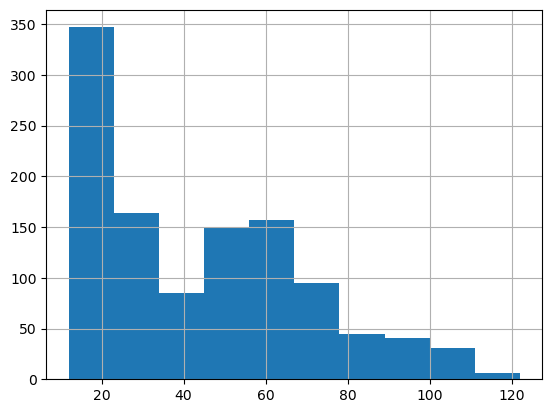

In [9]:
#Only Variable 'GarageYrBltN' had non meaningful NAn, the histrogram is being checked to know the distribution and the best way to repalce the NAN
GreenhouseData['GarageYrBltN'].hist()

In [10]:
#Since 'GarageYrBltN' has a skewed data, the NAN will be replaced with the Median values
median_GreenhouseData = GreenhouseData['GarageYrBltN'].median()
GreenhouseData['GarageYrBltN'] = GreenhouseData['GarageYrBltN'].fillna(median_GreenhouseData)


In [11]:
#Checking for Null again
GreenhouseData['GarageYrBltN'].isnull().sum()

0

In [12]:
#Adding new column to categorise building based on the green characteristics 
GreenhouseData['BuildType'] =np.where((GreenhouseData['RoofMatl'] == 'WdShake') | (GreenhouseData['RoofMatl'] == 'WdShngl')| (GreenhouseData['Exterior1st'] == 'Wd Sdng')| (GreenhouseData['Exterior1st'] == 'WdShing')| (GreenhouseData['Exterior2nd'] == 'Wd Sdng')| (GreenhouseData['Exterior2nd'] == 'WdShing')| (GreenhouseData['Foundation'] == 'Wood'),"GreenHouse","Non-GreenHouse")

<Axes: >

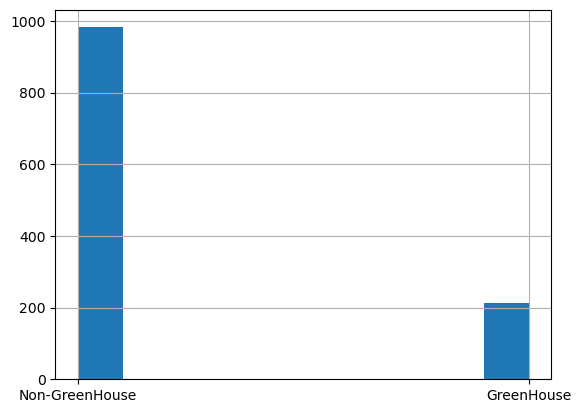

In [13]:
GreenhouseData['BuildType'].hist()

In [14]:
#Creating a new dataframe for the ordinal variables 
GreehouseData_Ordinal = GreenhouseData[['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','FireplaceQu','GarageCond','PoolQC','Fence']]
GreehouseData_Ordinal

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,FireplaceQu,GarageCond,PoolQC,Fence
0,Gd,TA,Gd,TA,No,Ex,Gd,NaN,NaN,TA,NaN,NaN
1,TA,TA,Gd,TA,Gd,Ex,TA,TA,TA,TA,NaN,NaN
2,Gd,TA,Gd,TA,Mn,Ex,Gd,TA,TA,TA,NaN,NaN
3,TA,TA,TA,Gd,No,Gd,Gd,Gd,Gd,TA,NaN,NaN
4,Gd,TA,Gd,TA,Av,Ex,Gd,TA,TA,TA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,TA,TA,Gd,TA,No,Ex,TA,TA,TA,TA,NaN,NaN
1190,TA,TA,Gd,TA,No,TA,TA,TA,TA,TA,NaN,MnPrv
1191,Ex,Gd,TA,Gd,No,Ex,Gd,Gd,Gd,TA,NaN,GdPrv
1192,TA,TA,TA,TA,Mn,Gd,Gd,NaN,NaN,TA,NaN,NaN


In [15]:
type(GreehouseData_Ordinal)

pandas.core.frame.DataFrame

In [16]:
# Encoding categorical variables in the data set with label coding and OneHotEncoding
#Label coding is being used for ordinal categorical variable

In [17]:
# Converting Pandas Dataframe to numpy data array
GreehouseData_Ordinal = GreehouseData_Ordinal.iloc[:,:].values

In [18]:
GreehouseData_Ordinal

array([['Gd', 'TA', 'Gd', ..., 'TA', nan, nan],
       ['TA', 'TA', 'Gd', ..., 'TA', nan, nan],
       ['Gd', 'TA', 'Gd', ..., 'TA', nan, nan],
       ...,
       ['Ex', 'Gd', 'TA', ..., 'TA', nan, 'GdPrv'],
       ['TA', 'TA', 'TA', ..., 'TA', nan, nan],
       ['Gd', 'TA', 'TA', ..., 'TA', nan, nan]], dtype=object)

In [19]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
cat=LabelEncoder()

In [20]:
y =list(range(12))
for i in y:
    GreehouseData_Ordinal[:,i]=cat.fit_transform(GreehouseData_Ordinal[:,i])

In [21]:
GreehouseData_Ordinal

array([[2, 4, 2, ..., 4, 3, 4],
       [3, 4, 2, ..., 4, 3, 4],
       [2, 4, 2, ..., 4, 3, 4],
       ...,
       [0, 2, 3, ..., 4, 3, 0],
       [3, 4, 3, ..., 4, 3, 4],
       [2, 4, 3, ..., 4, 3, 4]], dtype=object)

In [22]:
#Converting transformed ordinal variable in numpy data frame to pandas dataframe
GreehouseData_Ordinal=pd.DataFrame(GreehouseData_Ordinal)
GreehouseData_Ordinal

,0,1,2,3,4,5,6,7,8,9,10,11
0,2,4,2,3,3,0,2,5,5,4,3,4
1,3,4,2,3,1,0,3,4,4,4,3,4
2,2,4,2,3,2,0,2,4,4,4,3,4
3,3,4,3,1,3,2,2,2,2,4,3,4
4,2,4,2,3,0,0,2,4,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,3,4,2,3,3,0,3,4,4,4,3,4
1190,3,4,2,3,3,4,3,4,4,4,3,2
1191,0,2,3,1,3,0,2,2,2,4,3,0
1192,3,4,3,3,2,2,2,5,5,4,3,4


In [23]:
#Adding column header to the pandas dataframe
GreehouseData_Ordinal.columns =['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','FireplaceQu','GarageCond','PoolQC','Fence']
GreehouseData_Ordinal

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,FireplaceQu,GarageCond,PoolQC,Fence
0,2,4,2,3,3,0,2,5,5,4,3,4
1,3,4,2,3,1,0,3,4,4,4,3,4
2,2,4,2,3,2,0,2,4,4,4,3,4
3,3,4,3,1,3,2,2,2,2,4,3,4
4,2,4,2,3,0,0,2,4,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,3,4,2,3,3,0,3,4,4,4,3,4
1190,3,4,2,3,3,4,3,4,4,4,3,2
1191,0,2,3,1,3,0,2,2,2,4,3,0
1192,3,4,3,3,2,2,2,5,5,4,3,4


In [24]:
#Creating a new data frame for nominal variables
GreenhouseData_Nom= GreenhouseData[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleCondition']]

In [25]:
GreenhouseData_Nom

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
1,20,RL,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
2,60,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
3,70,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,NaN,NaN,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,60,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
1190,20,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,NaN,Normal
1191,70,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,Shed,Normal
1192,20,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,GasA,Y,FuseA,Typ,Attchd,Unf,Y,NaN,NaN,Normal


In [26]:
#Using OneHotEncoder for labelling nominal variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("encode",OneHotEncoder(),[0])],remainder="passthrough")

In [27]:
# Converting Pandas Dataframe to numpy data array
GreenhouseData_Nom = GreenhouseData_Nom.iloc[:,:].values

In [28]:
y =list(range(31))
for i in y:
    GreenhouseData_Nom[:,i]=cat.fit_transform(GreenhouseData_Nom[:,i])

In [29]:
 GreenhouseData_Nom

array([[5, 3, 1, ..., 4, 3, 4],
       [0, 3, 1, ..., 4, 3, 4],
       [5, 3, 1, ..., 4, 3, 4],
       ...,
       [6, 3, 1, ..., 0, 1, 4],
       [0, 3, 1, ..., 4, 3, 4],
       [0, 3, 1, ..., 4, 3, 4]], dtype=object)

In [30]:
#Convert Numpy Array to Pd Dataframe
GreenhouseData_Nom=pd.DataFrame(GreenhouseData_Nom)

In [31]:
#Concatenate sales price and nominal variable data frames
GreenhouseData_SalesP_NomVar =pd.concat([GreenhouseData["SalePrice"], GreenhouseData_Nom],axis=1) 
corr_greenhousecat= pd.DataFrame(columns=["r","p"])

In [32]:
#Viewing new dataframe
GreenhouseData_SalesP_NomVar


,SalePrice,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,208500,5,3,1,2,3,3,4,0,5,...,0,1,4,5,1,1,2,4,3,4
1,181500,0,3,1,2,3,3,2,0,24,...,0,1,4,5,1,1,2,4,3,4
2,223500,5,3,1,2,0,3,4,0,5,...,0,1,4,5,1,1,2,4,3,4
3,140000,6,3,1,2,0,3,0,0,6,...,0,1,4,5,5,2,2,4,3,0
4,250000,5,3,1,2,0,3,2,0,15,...,0,1,4,5,1,1,2,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,175000,5,3,1,2,3,3,4,0,8,...,0,1,4,5,1,1,2,4,3,4
1190,210000,0,3,1,2,3,3,4,0,14,...,0,1,4,2,1,2,2,2,3,4
1191,266500,6,3,1,2,3,3,4,0,6,...,0,1,4,5,1,1,2,0,1,4
1192,142125,0,3,1,2,3,3,4,0,12,...,0,1,0,5,1,2,2,4,3,4


In [33]:
# inserting columns header in the new dataframe
GreenhouseData_SalesP_NomVar.columns=['SalePrice','MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleCondition']

In [34]:
GreenhouseData_SalesP_NomVar

,SalePrice,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleCondition
0,208500,5,3,1,2,3,3,4,0,5,...,0,1,4,5,1,1,2,4,3,4
1,181500,0,3,1,2,3,3,2,0,24,...,0,1,4,5,1,1,2,4,3,4
2,223500,5,3,1,2,0,3,4,0,5,...,0,1,4,5,1,1,2,4,3,4
3,140000,6,3,1,2,0,3,0,0,6,...,0,1,4,5,5,2,2,4,3,0
4,250000,5,3,1,2,0,3,2,0,15,...,0,1,4,5,1,1,2,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,175000,5,3,1,2,3,3,4,0,8,...,0,1,4,5,1,1,2,4,3,4
1190,210000,0,3,1,2,3,3,4,0,14,...,0,1,4,2,1,2,2,2,3,4
1191,266500,6,3,1,2,3,3,4,0,6,...,0,1,4,5,1,1,2,0,1,4
1192,142125,0,3,1,2,3,3,4,0,12,...,0,1,0,5,1,2,2,4,3,4


In [35]:
# Correlation between the output variables and categorical variables
#Using Biserial correlation to test association between sales price and the nominal categorial variable
#Concatenate sales price and nominal variable data frames
corr_GreenhouseData_SalesP_NomVar= pd.DataFrame(columns=["r","p"])
for column in GreenhouseData_SalesP_NomVar:
    if column!=("SalePrice"):
        r,p=stats.pointbiserialr(GreenhouseData_SalesP_NomVar['SalePrice'],GreenhouseData_SalesP_NomVar[column])
        corr_GreenhouseData_SalesP_NomVar.loc[column] = [round(r,3),round(p,3)]

corr_GreenhouseData_SalesP_NomVar
corr_GreenhouseData_SalesP_NomVar.to_csv("corr_GreenhouseData_SalesP_NomVar.csv")

In [36]:

GreenhouseData_Nom= GreenhouseData[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleCondition']]
GreenhouseData_Nom.drop(columns=['Street','LandContour','LandSlope','Condition2','MasVnrType','BsmtFinType2'],inplace=True)
GreenhouseData_Nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1194 non-null   int64 
 1   MSZoning       1194 non-null   object
 2   Alley          85 non-null     object
 3   LotShape       1194 non-null   object
 4   LotConfig      1194 non-null   object
 5   Neighborhood   1194 non-null   object
 6   Condition1     1194 non-null   object
 7   BldgType       1194 non-null   object
 8   HouseStyle     1194 non-null   object
 9   RoofStyle      1194 non-null   object
 10  RoofMatl       1194 non-null   object
 11  Exterior1st    1194 non-null   object
 12  Exterior2nd    1194 non-null   object
 13  Foundation     1194 non-null   object
 14  BsmtFinType1   1163 non-null   object
 15  Heating        1194 non-null   object
 16  CentralAir     1194 non-null   object
 17  Electrical     1194 non-null   object
 18  Functional     1194 non-null

In [37]:
#Generating number of categories in each variable
y=list(GreenhouseData_Nom)
for i in y:
    print(GreenhouseData_Nom[i].value_counts().count())


15
5
2
4
5
25
9
5
8
5
7
15
16
6
6
5
2
5
6
6
3
3
4
3
6


In [38]:
print(GreenhouseData_Nom['Alley'].value_counts().count())

2


<Axes: >

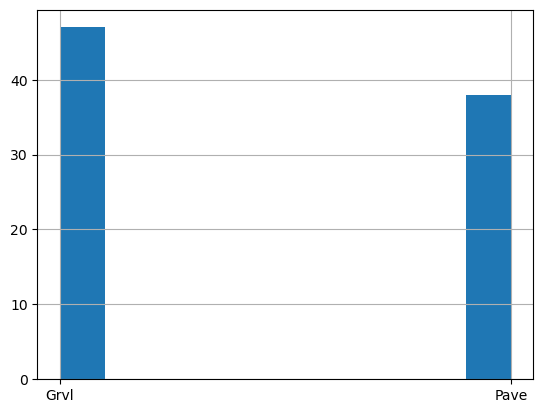

In [39]:
GreenhouseData_Nom['Alley'].hist()

In [40]:
# Creating a copy of the data in line 84
GreenhouseData_Nom_copy1=GreenhouseData_Nom.copy()
GreenhouseData_Nom_copy1

,MSSubClass,MSZoning,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleCondition
0,60,RL,NaN,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
1,20,RL,NaN,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
2,60,RL,NaN,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
3,70,RL,NaN,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,NaN,NaN,Abnorml
4,60,RL,NaN,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,60,RL,NaN,Reg,Inside,Gilbert,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
1190,20,RL,NaN,Reg,Inside,NWAmes,Norm,1Fam,1Story,Gable,...,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,NaN,Normal
1191,70,RL,NaN,Reg,Inside,Crawfor,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,Shed,Normal
1192,20,RL,NaN,Reg,Inside,NAmes,Norm,1Fam,1Story,Hip,...,GasA,Y,FuseA,Typ,Attchd,Unf,Y,NaN,NaN,Normal


In [41]:
#use oneHotEncoder to transform all nominal categorical variables
Y=[0,15,20,23,27,32,57,66,71,79,84,91,106,122,128,135,140,142,147,153,160,164,167,172,176]    #number in parenthesis are index number of the columns in the GreenhouseData_Nom_copy after each iteration
for i in Y:
    ct = ColumnTransformer(transformers=[("encode",OneHotEncoder(),[i])],remainder="passthrough")   
    x =ct.fit_transform(GreenhouseData_Nom_copy1)
    GreenhouseData_Nom_copy1=pd.DataFrame(x)
    GreenhouseData_Nom_copy1

In [42]:
# Creating a copy of the data in line 84
GreenhouseData_Nom_copy=GreenhouseData_Nom.copy()

In [43]:
GreenhouseData_Nom_copy

,MSSubClass,MSZoning,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleCondition
0,60,RL,NaN,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
1,20,RL,NaN,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
2,60,RL,NaN,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
3,70,RL,NaN,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,NaN,NaN,Abnorml
4,60,RL,NaN,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,60,RL,NaN,Reg,Inside,Gilbert,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,Normal
1190,20,RL,NaN,Reg,Inside,NWAmes,Norm,1Fam,1Story,Gable,...,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,NaN,Normal
1191,70,RL,NaN,Reg,Inside,Crawfor,Norm,1Fam,2Story,Gable,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,Shed,Normal
1192,20,RL,NaN,Reg,Inside,NAmes,Norm,1Fam,1Story,Hip,...,GasA,Y,FuseA,Typ,Attchd,Unf,Y,NaN,NaN,Normal


In [44]:
#use oneHotEncoder to transform all nominal categorical variables
Y=[0,15,20,23,27,32,57,66,71,79,84,91,106,122,128,135,140,142,147,153,160,164,167,172,176]    #number in parenthesis are index number of the columns in the GreenhouseData_Nom_copy after each iteration
for i in Y:
    ct = ColumnTransformer(transformers=[("encode",OneHotEncoder(),[i])],remainder="passthrough")   
    x =ct.fit_transform(GreenhouseData_Nom_copy)
    GreenhouseData_Nom_copy=pd.DataFrame(x)
    GreenhouseData_Nom_copy

In [45]:
 GreenhouseData_Nom_copy

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1190,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1192,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Inserting column headers for the new dataframe


In [47]:
GreenhouseData_Nom= GreenhouseData[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleCondition']]
GreenhouseData_Nom.drop(columns=['Street','LandContour','LandSlope','Condition2','MasVnrType','BsmtFinType2'],inplace=True)
GreenhouseData_Nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1194 non-null   int64 
 1   MSZoning       1194 non-null   object
 2   Alley          85 non-null     object
 3   LotShape       1194 non-null   object
 4   LotConfig      1194 non-null   object
 5   Neighborhood   1194 non-null   object
 6   Condition1     1194 non-null   object
 7   BldgType       1194 non-null   object
 8   HouseStyle     1194 non-null   object
 9   RoofStyle      1194 non-null   object
 10  RoofMatl       1194 non-null   object
 11  Exterior1st    1194 non-null   object
 12  Exterior2nd    1194 non-null   object
 13  Foundation     1194 non-null   object
 14  BsmtFinType1   1163 non-null   object
 15  Heating        1194 non-null   object
 16  CentralAir     1194 non-null   object
 17  Electrical     1194 non-null   object
 18  Functional     1194 non-null

In [48]:
GreenhouseData_Nom.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType1',
       'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleCondition'],
      dtype='object')

In [49]:
#Inserting column headers for the new dataframe
GreenhouseData_Nom_copy.columns =['MSSubClass1','MSSubClass2','MSSubClass3','MSSubClass4','MSSubClass5','MSSubClass6','MSSubClass7','MSSubClass8','MSSubClass9','MSSubClass10','MSSubClass11','MSSubClass12','MSSubClass13','MSSubClass14','MSSubClass15','MSZoning1','MSZoning2','MSZoning3','MSZoning4','MSZoning5','Alley1','Alley2','Alley3','LotShape1','LotShape2','LotShape3','LotShape4','LotConfig1','LotConfig2','LotConfig3','LotConfig4','LotConfig5','Neighborhood1','Neighborhood2','Neighborhood3','Neighborhood4','Neighborhood5','Neighborhood6','Neighborhood7','Neighborhood8','Neighborhood9','Neighborhood10','Neighborhood11','Neighborhood12','Neighborhood13','Neighborhood14','Neighborhood15','Neighborhood16','Neighborhood17','Neighborhood18','Neighborhood19','Neighborhood20','Neighborhood21','Neighborhood22','Neighborhood23','Neighborhood24','Neighborhood25','Condition1','Condition2','Condition3','Condition4','Condition5','Condition6','Condition7','Condition8','Condition9','BldgType1','BldgType2','BldgType3','BldgType4','BldgType5','HouseStyle1','HouseStyle2','HouseStyle3','HouseStyle4','HouseStyle5','HouseStyle6','HouseStyle7','HouseStyle8','RoofStyle1','RoofStyle2','RoofStyle3','RoofStyle4','RoofStyle5','RoofMatl1','RoofMatl2','RoofMatl3','RoofMatl4','RoofMatl5','RoofMatl6','RoofMatl7','Exterior1st1','Exterior1st2','Exterior1st3','Exterior1st4','Exterior1st5','Exterior1st6','Exterior1st7','Exterior1st8','Exterior1st9','Exterior1st10','Exterior1st11','Exterior1st12','Exterior1st13','Exterior1st14','Exterior1st15','Exterior2nd1','Exterior2nd2','Exterior2nd3','Exterior2nd4','Exterior2nd5','Exterior2nd6','Exterior2nd7','Exterior2nd8','Exterior2nd9','Exterior2nd10','Exterior2nd11','Exterior2nd12','Exterior2nd13','Exterior2nd14','Exterior2nd15','Exterior2nd16','Foundation1','Foundation2','Foundation3','Foundation4','Foundation5','Foundation6','BsmtFinType11','BsmtFinType12','BsmtFinType13','BsmtFinType14','BsmtFinType15','BsmtFinType16','BsmtFinType17','Heating1','Heating2','Heating3','Heating4','Heating5','CentralAir1','CentralAir2','Electrical1','Electrical2','Electrical3','Electrical4','Electrical5','Functional1','Functional2','Functional3','Functional4','Functional5','Functional6','GarageType1','GarageType2','GarageType3','GarageType4','GarageType5','GarageType6','GarageType7','GarageFinish1','GarageFinish2','GarageFinish3','GarageFinish4','PavedDrive1','PavedDrive2','PavedDrive3','Fence1','Fence2','Fence3','Fence4','Fence5','MiscFeature1','MiscFeature2','MiscFeature3','MiscFeature4','SaleCondition1','SaleCondition2','SaleCondition3','SaleCondition4','SaleCondition5','SaleCondition6']

In [50]:
#View 
GreenhouseData_Nom_copy

,MSSubClass1,MSSubClass2,MSSubClass3,MSSubClass4,MSSubClass5,MSSubClass6,MSSubClass7,MSSubClass8,MSSubClass9,MSSubClass10,...,MiscFeature1,MiscFeature2,MiscFeature3,MiscFeature4,SaleCondition1,SaleCondition2,SaleCondition3,SaleCondition4,SaleCondition5,SaleCondition6
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1190,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1192,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
GreenhouseData_Nom_copy.to_csv('GreenhouseData_Nom1.csv')

In [52]:
#Dropping all encoded categorical variables from the original data set
GreenhouseData_Cont = GreenhouseData.drop(columns= ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType1',
       'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleCondition','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','FireplaceQu','GarageCond','PoolQC','Street','LandContour','LandSlope','Condition2','MasVnrType','BsmtFinType2','Utilities','SaleType','GarageQual'])

In [53]:
GreenhouseData_Cont

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GarageYrBltN,BuildType
0,1,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,0,0,2,2008,208500,19.0,Non-GreenHouse
1,2,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,0,0,5,2007,181500,46.0,Non-GreenHouse
2,3,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,0,0,9,2008,223500,21.0,Non-GreenHouse
3,4,60,9550,7,5,1915,1970,0,216,0,...,272,0,0,0,0,2,2006,140000,24.0,GreenHouse
4,5,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,0,0,12,2008,250000,22.0,Non-GreenHouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1456,62,7917,6,5,1999,2000,0,0,0,...,0,0,0,0,0,8,2007,175000,23.0,Non-GreenHouse
1190,1457,85,13175,6,6,1978,1988,119,790,163,...,0,0,0,0,0,2,2010,210000,44.0,Non-GreenHouse
1191,1458,66,9042,7,9,1941,2006,0,275,0,...,0,0,0,0,2500,5,2010,266500,81.0,Non-GreenHouse
1192,1459,68,9717,5,6,1950,1996,0,49,1029,...,112,0,0,0,0,4,2010,142125,72.0,Non-GreenHouse


In [54]:
GreenhouseData_Cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1194 non-null   int64  
 1   LotFrontage    1194 non-null   int64  
 2   LotArea        1194 non-null   int64  
 3   OverallQual    1194 non-null   int64  
 4   OverallCond    1194 non-null   int64  
 5   YearBuilt      1194 non-null   int64  
 6   YearRemodAdd   1194 non-null   int64  
 7   MasVnrArea     1194 non-null   int64  
 8   BsmtFinSF1     1194 non-null   int64  
 9   BsmtFinSF2     1194 non-null   int64  
 10  BsmtUnfSF      1194 non-null   int64  
 11  TotalBsmtSF    1194 non-null   int64  
 12  1stFlrSF       1194 non-null   int64  
 13  2ndFlrSF       1194 non-null   int64  
 14  LowQualFinSF   1194 non-null   int64  
 15  GrLivArea      1194 non-null   int64  
 16  BsmtFullBath   1194 non-null   int64  
 17  BsmtHalfBath   1194 non-null   int64  
 18  FullBath

In [55]:
#Appending all data frames(numerical, ordinal categorical and nominal categorical data frames)
GreenhouseData_New =pd.concat([GreenhouseData_Cont, GreenhouseData_Nom_copy, GreehouseData_Ordinal],axis=1) 

In [56]:
GreenhouseData_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Columns: 233 entries, Id to Fence
dtypes: float64(2), int64(36), object(195)
memory usage: 2.1+ MB


In [60]:
GreenhouseData_New["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1189    175000
1190    210000
1191    266500
1192    142125
1193    147500
Name: SalePrice, Length: 1194, dtype: int64

In [63]:
#Correlation among the outputvariables and the numeric variables
from scipy import stats
corr_list = []
y = greenhousecont["SalePrice"].astype(float)


for column in greenhousecont:
    x=greenhousecont[column]
    corr = stats.pointbiserialr(list(x), list(y))
    corr_list.append(corr[0])
print(corr_list)

NameError: name 'greenhousecont' is not defined

In [ ]:
# Correlation with p-values
corr_greenhousecont= pd.DataFrame(columns=["r","p"])
for column in greenhousecont:
    if pd.api.types.is_numeric_dtype(greenhousecont[column]) and column!="SalePrice":
        r,p=stats.pearsonr(greenhousecont.SalePrice,greenhousecont[column])
        corr_greenhousecont.loc[column] = [round(r,3),round(p,3)]

corr_greenhousecont
corr_greenhousecont.to_csv("Corr_coeff.csv")

In [ ]:
# Correlation between the output variables and categorical variables
#Using Biserial correlation to test association between sales price and the nominal categorial variable
#Concatenate sales price and nominal variable data frames
GreenhouseData_SalesP_NomVar =pd.concat([GreenhouseData["SalePrice"], GreenhouseData_Nom],axis=1) 
corr_greenhousecat= pd.DataFrame(columns=["r","p"])

for column in greenhousecat:
    if column!=("SalePrice")and column!=("Utilities"):
        r,p=stats.pointbiserialr(greenhousecat.SalePrice,greenhousecat[column])
        corr_greenhousecat.loc[column] = [round(r,3),round(p,3)]

corr_greenhousecat
corr_greenhousecat.to_csv("corr_greenhousecat.csv")

In [ ]:
#Data Exploration 

In [ ]:
plt.scatter(GreenhouseData_New ['OverallQual'],GreenhouseData_New['SalePrice'])
plt.title("ScatterPlot of House Prices and Overall Quality of House")
plt.xlabel("Overall Quality")
plt.ylabel("House Sales Price")
plt.show()

In [ ]:
GreenhouseData_New.plot.scatter('GrLivArea','SalePrice')
plt.xlabel("Ground Living Area Square Feet")
plt.ylabel("House Sales Price")
plt.show()

In [ ]:
GreenhouseData_New.plot.scatter('1stFlrSF','SalePrice')
plt.xlabel("First Floor square feet")
plt.ylabel("House Sales Price")
plt.show()


In [ ]:
GreenhouseData_New.plot.scatter('OverallQual','SalePrice')
plt.xlabel("Overall Quality")
plt.ylabel("House Sales Price")
plt.show()

In [ ]:
GreenhouseData_New.plot.scatter(('GrLivArea','SalePrice'),ylabel='SalePrice',xlabel="Ground Living Area")

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
GreenhouseData_New.boxplot(column=['SalePrice'], by='BuildType', ax=ax,)
plt.title("")
plt.xlabel("Building Type")
plt.ylabel("House Sales Price($)")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib notebook
corr_mat = corr_data.corr().round(2)
plot=sns.heatmap(corr_mat, annot=True)

In [ ]:
corr_mat = corr_data.corr().round(2)
plot=sns.heatmap(corr_mat, annot=True)

In [ ]:
GreenhouseData_Cont.columns

In [ ]:
#Creating dataframe for top ten most correlating numerical features
corr_data = GreenhouseData_New[['SalePrice','OverallQual','ExterQual','GrLivArea','KitchenQual','GarageCars','1stFlrSF','BsmtQual','FullBath','YearBuilt','FireplaceQu']]

In [ ]:
GreenhouseData_Cont

In [ ]:
corr_data

In [ ]:
#Random forest Regression with full sample


In [ ]:
#the input and output features preparation
Y = greenhouse["SalePrice"]
Y.shape

X=greenhouse.drop(["SalePrice","Sustainability"], axis=1)
X.shape


In [ ]:
#Spliting data into training and testing data data
#Importing train_test_split function
from sklearn.model_selection import train_test_split
#Splitting the dataset
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=20)

In [ ]:
#Instantiation of the model
model = RandomForestRegressor()
greenhouse1 =model.fit(X_train,Y_train)

In [ ]:
#prediction on on training dataset
Ytrain_pred = greenhouse1.predict(X_train)


In [ ]:
print('The MAE is:%.2f'%mean_absolute_error(Y_test,Ytest_pred))
print('The MSE is:%.2f'%mean_squared_error(Y_test,Ytest_pred))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_test,Ytest_pred)))
print('The EVS is:%.2f'% explained_variance_score(Y_test,Ytest_pred))

In [ ]:
#plotting the observed and predicted data
import matplotlib.pyplot as plt
#setting the boundaries and parameters
plt.rcParams['figure.figsize']=(10,6)
x_ax =range(len(X_test))
#plotting
plt.plot(x_ax,Y_test,label="Oberved", color="k", linestyle="-")
plt.plot(x_ax,Ytest_pred, label="Predicted", color='red', linestyle='--')
plt.ylabel("SalePrice")
plt.xlabel('Testing Sample Data')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center', ncol=2)

In [ ]:
#plotting the residuals
from yellowbrick.regressor import PredictionError

In [ ]:
visualizer = PredictionError(greenhouse1)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
#plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(greenhouse1)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
#Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [ ]:
f_list =list(X.columns)
F_importance= pd.Series(greenhouse1.feature_importances_,index=f_list).sort_values(ascending=False)

In [ ]:
F_importance.to_csv("Features Importance.csv")

In [ ]:
#Random Forest Regression for the Green building sample
Y = greenbuilding["SalePrice"]
Y.shape

X=greenbuilding.drop(["SalePrice","Green_or_Not"], axis=1)
X.shape

In [ ]:
#Spliting data into training and testing data data
#Importing train_test_split function
from sklearn.model_selection import train_test_split
#Splitting the dataset
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=20)


In [ ]:
model = RandomForestRegressor()
greenbuilding_rf =model.fit(X_train,Y_train)
Y_train_pred = greenbuilding_rf.predict(X_train)
Y_test_pred = greenbuilding_rf.predict(X_test)

In [ ]:
%matplotlib notebook
visualizer = PredictionError(greenbuilding_rf)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
#Model Evaluation for train data
print('The training R-Sq is: %.2f'% greenbuilding_rf.score(X_train,Y_train))
print('The MAE is:%.2f'%mean_absolute_error(Y_train,Y_train_pred))
print('The MSE is:%.2f'%mean_squared_error(Y_train,Y_train_pred))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_train,Y_train_pred)))
print('The EVS is:%.2f'% explained_variance_score(Y_train,Y_train_pred))

In [ ]:
#Model Evaluation for test data
print('The testing r_sq is: %.2f'% greenbuilding_rf.score(X_test,Y_test))
print('The MAE is:%.2f'%mean_absolute_error(Y_test,Y_test_pred))
print('The MSE is:%.2f'%mean_squared_error(Y_test,Y_test_pred))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_test,Y_test_pred)))
print('The EVS is:%.2f'% explained_variance_score(Y_test,Y_test_pred))

In [ ]:
#plotting the observed and predicted data
import matplotlib.pyplot as plt
#setting the boundaries and parameters
plt.rcParams['figure.figsize']=(10,6)
x_ax =range(len(X_test))
#plotting
plt.plot(x_ax,Y_test,label="Oberved", color="k", linestyle="-")
plt.plot(x_ax,Y_test_pred, label="Predicted", color='red', linestyle='--')
plt.ylabel("SalePrice")
plt.xlabel('Testing Sample Data')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center', ncol=2)

In [ ]:
#plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(greenbuilding_rf)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
# Random forest regression for the non-green building sample
Y = Nongreenbuilding["SalePrice"]
Y.shape

X=Nongreenbuilding.drop(["SalePrice","Green_or_Not"], axis=1)
X.shape

In [ ]:
#Spliting data into training and testing data data
#Importing train_test_split function
from sklearn.model_selection import train_test_split
#Splitting the dataset
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=20)

In [ ]:
model = RandomForestRegressor()
Nongreenbuilding_rf =model.fit(X_train,Y_train)
Y_train_pred = Nongreenbuilding_rf.predict(X_train)
Y_test_pred = Nongreenbuilding_rf.predict(X_test)

In [ ]:
%matplotlib notebook
visualizer = PredictionError(Nongreenbuilding_rf)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
#Model Evaluation for train data
print('The training R-Sq is: %.2f'% Nongreenbuilding_rf.score(X_train,Y_train))
print('The MAE is:%.2f'%mean_absolute_error(Y_train,Y_train_pred))
print('The MSE is:%.2f'%mean_squared_error(Y_train,Y_train_pred))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_train,Y_train_pred)))
print('The EVS is:%.2f'% explained_variance_score(Y_train,Y_train_pred))

In [ ]:
print('The testing r_sq is: %.2f'% Nongreenbuilding_rf.score(X_test,Y_test))
print('The MAE is:%.2f'%mean_absolute_error(Y_test,Y_test_pred))
print('The MSE is:%.2f'%mean_squared_error(Y_test,Y_test_pred))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_test,Y_test_pred)))
print('The EVS is:%.2f'% explained_variance_score(Y_test,Y_test_pred))

In [ ]:
#setting the boundaries and parameters
plt.rcParams['figure.figsize']=(10,6)
x_ax =range(len(X_test))
#plotting
plt.plot(x_ax,Y_test,label="Oberved", color="k", linestyle="-")
plt.plot(x_ax,Y_test_pred, label="Predicted", color='red', linestyle='--')
plt.ylabel("SalePrice")
plt.xlabel('Testing Sample Data')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center', ncol=2)

In [ ]:
visualizer = ResidualsPlot(Nongreenbuilding_rf)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
# Gradient Boosting Regression full sample

In [ ]:
# SPliting input and output variables
X=greenhouse.drop(["SalePrice","Sustainability"], axis=1)
X.shape
Y = greenhouse["SalePrice"]
Y.shape

In [ ]:
#Splitting the dataset
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=20)

In [ ]:
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [ ]:
#Train gradientboost Regressor
greenhousegb= gradientregressor.fit(X_train,Y_train)

In [ ]:
#prediction on on training dataset
Y_train_pred_gb = greenhousegb.predict(X_train)


In [ ]:
#Predict the response for test dataset
y_test_pred_gb =greenhousegb.predict(X_test)

In [ ]:
#Features ranking
f_list =list(X.columns)
F_importancegb= pd.Series(greenhousegb.feature_importances_,index=f_list).sort_values(ascending=False)

In [ ]:
visualizer = PredictionError(greenhousegb)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(greenhousegb)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,6)
x_ax =range(len(X_test))
#plotting
plt.plot(x_ax,Y_test,label="Oberved", color="k", linestyle="-")
plt.plot(x_ax,y_test_pred_gb, label="Predicted", color='red', linestyle='--')
plt.ylabel("SalePrice")
plt.xlabel('Testing Sample Data')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center', ncol=2)

In [ ]:
#Model Evaluation for train data
print('The training R-Sq is: %.2f'% greenhousegb.score(X_train,Y_train))
print('The MAE is:%.2f'%mean_absolute_error(Y_train,Y_train_pred_gb))
print('The MSE is:%.2f'%mean_squared_error(Y_train,Y_train_pred_gb))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_train,Y_train_pred_gb)))
print('The EVS is:%.2f'% explained_variance_score(Y_train,Y_train_pred_gb))

In [ ]:
#Model Evaluation for test data
print('The MAE is:%.2f'%mean_absolute_error(Y_test,y_test_pred_gb))
print('The MSE is:%.2f'%mean_squared_error(Y_test,y_test_pred_gb))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_test,y_test_pred_gb)))
print('The EVS is:%.2f'% explained_variance_score(Y_test,y_test_pred_gb))

In [ ]:
# Estimating gradinet boosting regression with green building sample
Y = greenbuilding["SalePrice"]
Y.shape

X=greenbuilding.drop(["SalePrice","Green_or_Not"], axis=1)
X.shape

In [ ]:
#Splitting the dataset
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=20)

In [ ]:
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
greenhousegb= gradientregressor.fit(X_train,Y_train)
Y_train_pred_gb = greenhousegb.predict(X_train)
Y_test_pred_gb =greenhousegb.predict(X_test)

In [ ]:
#Model Evaluation for train data
print('The training R-Sq is: %.2f'% greenhousegb.score(X_train,Y_train))
print('The MAE is:%.2f'%mean_absolute_error(Y_train,Y_train_pred_gb))
print('The MSE is:%.2f'%mean_squared_error(Y_train,Y_train_pred_gb))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_train,Y_train_pred_gb)))
print('The EVS is:%.2f'% explained_variance_score(Y_train,Y_train_pred_gb))

In [ ]:
print('The testing r_sq is: %.2f'% greenhousegb.score(X_test,Y_test))
print('The MAE is:%.2f'%mean_absolute_error(Y_test,Y_test_pred_gb))
print('The MSE is:%.2f'%mean_squared_error(Y_test,Y_test_pred_gb))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_test,Y_test_pred_gb)))
print('The EVS is:%.2f'% explained_variance_score(Y_test,Y_test_pred_gb))

In [ ]:
visualizer = PredictionError(greenhousegb)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
visualizer = ResidualsPlot(greenhousegb)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
x_ax =range(len(X_test))
#plotting
plt.plot(x_ax,Y_test,label="Oberved", color="k", linestyle="-")
plt.plot(x_ax,Y_test_pred_gb, label="Predicted", color='red', linestyle='--')
plt.ylabel("SalePrice")
plt.xlabel('Testing Sample Data')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center', ncol=2)

In [ ]:
# Estimating gradinet boosting regression with non- green building sample

In [ ]:
Y = Nongreenbuilding["SalePrice"]
Y.shape

X=Nongreenbuilding.drop(["SalePrice","Green_or_Not"], axis=1)
X.shape

In [ ]:
#Splitting the dataset
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=20)

In [ ]:
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
greenhousegb= gradientregressor.fit(X_train,Y_train)
Y_train_pred_gb = greenhousegb.predict(X_train)
Y_test_pred_gb =greenhousegb.predict(X_test)

In [ ]:
print('The training R-Sq is: %.2f'% greenhousegb.score(X_train,Y_train))
print('The MAE is:%.2f'%mean_absolute_error(Y_train,Y_train_pred_gb))
print('The MSE is:%.2f'%mean_squared_error(Y_train,Y_train_pred_gb))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_train,Y_train_pred_gb)))
print('The EVS is:%.2f'% explained_variance_score(Y_train,Y_train_pred_gb))

In [ ]:
print('The testing r_sq is: %.2f'% greenhousegb.score(X_test,Y_test))
print('The MAE is:%.2f'%mean_absolute_error(Y_test,Y_test_pred_gb))
print('The MSE is:%.2f'%mean_squared_error(Y_test,Y_test_pred_gb))
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(Y_test,Y_test_pred_gb)))
print('The EVS is:%.2f'% explained_variance_score(Y_test,Y_test_pred_gb))

In [ ]:
visualizer = PredictionError(greenhousegb)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
visualizer = ResidualsPlot(greenhousegb)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
x_ax =range(len(X_test))
#plotting
plt.plot(x_ax,Y_test,label="Oberved", color="k", linestyle="-")
plt.plot(x_ax,Y_test_pred_gb, label="Predicted", color='red', linestyle='--')
plt.ylabel("SalePrice")
plt.xlabel('Testing Sample Data')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center', ncol=2)